In [1]:
import torch.nn.functional as F
import torch

import numpy as np
import matplotlib.pyplot as plt

from nanotron.helpers import _get_lr_lambda_in_training
from nanotron.config import LRSchedulerArgs

In [2]:
def plot_changes(changes):
    import matplotlib.pyplot as plt
    # Plotting the changes
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(changes) + 1), changes)
    plt.title('Absolute Weight Changes per Step')
    plt.xlabel('Step')
    plt.ylabel('Absolute Weight Change')
    plt.grid(True)
    plt.show()

def plot_accumulated_changes(changes):
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Calculate accumulated changes
    accumulated_changes = np.cumsum(changes)
    
    # Plotting the accumulated changes
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(accumulated_changes) + 1), accumulated_changes)
    plt.title('Accumulated Weight Changes per Step')
    plt.xlabel('Step')
    plt.ylabel('Accumulated Weight Change')
    plt.grid(True)
    plt.show()

In [3]:
import math
import numpy as np

def simulate_adam_update(lr_scheduler_args, total_steps, l2_norm_gradient, beta1=0.9, beta2=0.95, epsilon=1.0e-08):
    m = 0  # First moment vector
    v = 0  # Second moment vector
    t = 0  # Timestep

    total_weight_change = 0
    changes = []
    gradients = []

    for step in range(1, total_steps + 1):
        t += 1
        lr = _get_lr_lambda_in_training(
            current_step=t,
            initial_lr=lr_scheduler_args.learning_rate,
            total_training_steps=total_steps,
            lr_scheduler_args=lr_scheduler_args
        ) * lr_scheduler_args.learning_rate

        # Simulate gradient
        # gradient = abs(np.random.randn() * l2_norm_gradient / math.sqrt(1))
        gradient = l2_norm_gradient

        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * (gradient**2)
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)

        # Compute update
        update = lr * m_hat / (math.sqrt(v_hat) + epsilon)
        
        total_weight_change += abs(update)
        changes.append(abs(update))
        gradients.append(abs(gradient))

    return total_weight_change, changes, gradients

In [4]:
debug_total_changes, changes, _ = simulate_adam_update(LRSchedulerArgs(
    learning_rate=0.001,
    lr_warmup_steps=50,
    lr_warmup_style="constant",
    lr_decay_style="cosine",
    lr_decay_steps=None,
    lr_decay_starting_step=None,
    min_decay_lr=1.0e-05
), 3000, l2_norm_gradient=0.00001)

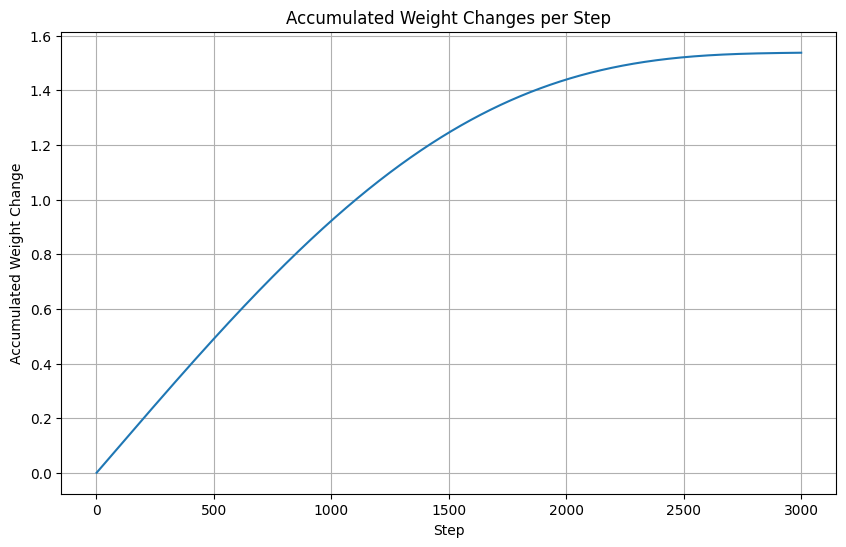

In [7]:
plot_accumulated_changes(changes)

In [16]:
simulate_adam_update(LRSchedulerArgs(
    learning_rate=0.0005,
    lr_warmup_steps=4000,
    lr_warmup_style="linear",
    lr_decay_style="cosine",
    lr_decay_steps=16000,
    lr_decay_starting_step=None,
    min_decay_lr=1.0e-05
), 20000, l2_norm_gradient=0.00001)[0]

5.074930069930068

In [14]:
simulate_adam_update(LRSchedulerArgs(
    learning_rate=0.00015/2,
    lr_warmup_steps=1000,
    lr_warmup_style="linear",
    lr_decay_style="cosine",
    lr_decay_steps=None,
    lr_decay_starting_step=None,
    min_decay_lr=1.0e-05
), total_steps=20000, l2_norm_gradient=0.01)[0]

0.8450041549958394

In [16]:
simulate_adam_update(LRSchedulerArgs(
    learning_rate=0.0001,
    lr_warmup_steps=1000,
    lr_warmup_style="linear",
    lr_decay_style="cosine",
    lr_decay_steps=None,
    lr_decay_starting_step=None,
    min_decay_lr=1.0e-05
), total_steps=20000, l2_norm_gradient=0.01)[0]

1.0950039049960907

In [12]:
simulate_adam_update(LRSchedulerArgs(
    learning_rate=0.00015,
    lr_warmup_steps=1000,
    lr_warmup_style="linear",
    lr_decay_style="cosine",
    lr_decay_steps=None,
    lr_decay_starting_step=None,
    min_decay_lr=1.0e-05
), total_steps=20000, l2_norm_gradient=0.01)[0]

1.5950034049965929

In [25]:
simulate_adam_update(LRSchedulerArgs(
    learning_rate=0.00015,
    lr_warmup_steps=2000,
    lr_warmup_style="linear",
    lr_decay_style="cosine",
    lr_decay_steps=None,
    lr_decay_starting_step=None,
    min_decay_lr=1.0e-05
), total_steps=20000, l2_norm_gradient=0.01)[0]

1.5900034099965823

In [28]:
simulate_adam_update(LRSchedulerArgs(
    learning_rate=0.00015,
    lr_warmup_steps=4000,
    lr_warmup_style="linear",
    lr_decay_style="cosine",
    lr_decay_steps=None,
    lr_decay_starting_step=None,
    min_decay_lr=1.0e-05
), total_steps=20000, l2_norm_gradient=0.01)[0]

1.5800034199965796

In [13]:
simulate_adam_update(LRSchedulerArgs(
    learning_rate=0.0003,
    lr_warmup_steps=1000,
    lr_warmup_style="linear",
    lr_decay_style="cosine",
    lr_decay_steps=None,
    lr_decay_starting_step=None,
    min_decay_lr=1.0e-05
), total_steps=20000, l2_norm_gradient=0.01)[0]

3.095001904998105

In [29]:
torch.sigmoid(torch.tensor([1.0950039049960907, 1.5950034049965929, 1.5800034199965796, 2.3950026049973743, 3.095001904998105]))

tensor([0.7493, 0.8313, 0.8292, 0.9164, 0.9567])

In [ ]:
simulate_adam_update(LRSchedulerArgs(
    learning_rate=0.00,
    lr_warmup_steps=1000,
    lr_warmup_style="linear",
    lr_decay_style="cosine",
    lr_decay_steps=None,
    lr_decay_starting_step=None,
    min_decay_lr=1.0e-05
), total_steps=20000, l2_norm_gradient=0.01)[0]

In [ ]:
plot_accumulated_changes(simulate_adam_update(LRSchedulerArgs(
    learning_rate=0.0000375,
    lr_warmup_steps=5000,
    lr_warmup_style="linear",
    lr_decay_style="cosine",
    lr_decay_steps=None,
    lr_decay_starting_step=None,
    min_decay_lr=0.000015
), total_steps=50000, l2_norm_gradient=0.1)[1])

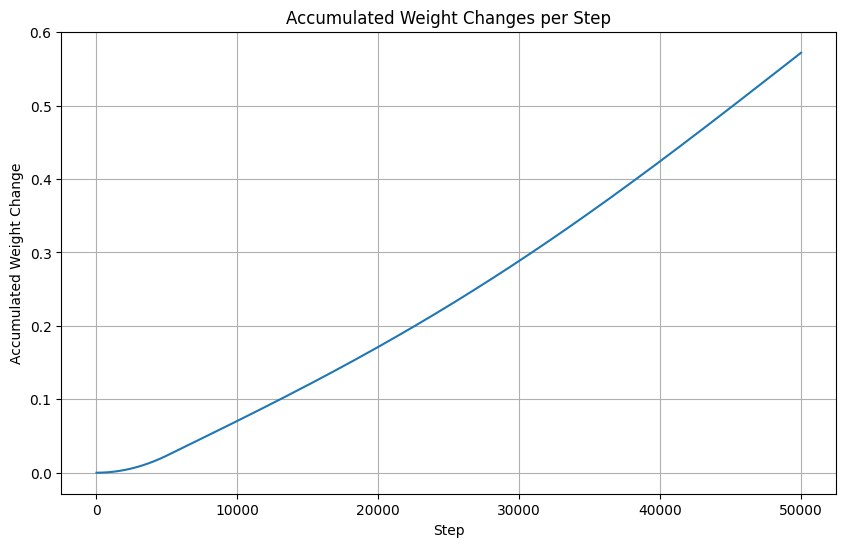

In [26]:
plot_accumulated_changes(simulate_adam_update(LRSchedulerArgs(
    learning_rate= 0.00015,
    lr_warmup_steps=5000,
    lr_warmup_style="linear",
    lr_decay_style="cosine",
    lr_decay_steps=None,
    lr_decay_starting_step=None,
    min_decay_lr=0.000015
), total_steps=50000, l2_norm_gradient=0.1)[1])

In [33]:
F.sigmoid(torch.tensor(-0.4))

tensor(0.4013)

### Exp 32

In [9]:
exp32_total_change, exp32_changes, _ = simulate_adam_update(LRSchedulerArgs(
    learning_rate=0.00015,
    lr_warmup_steps=14000,
    lr_warmup_style="linear",
    lr_decay_style="cosine",
    lr_decay_steps=None,
    lr_decay_starting_step=None,
    min_decay_lr=1.0e-05
), total_steps=35000, l2_norm_gradient=0.01)

In [10]:
exp32_total_change

17.604987395012746

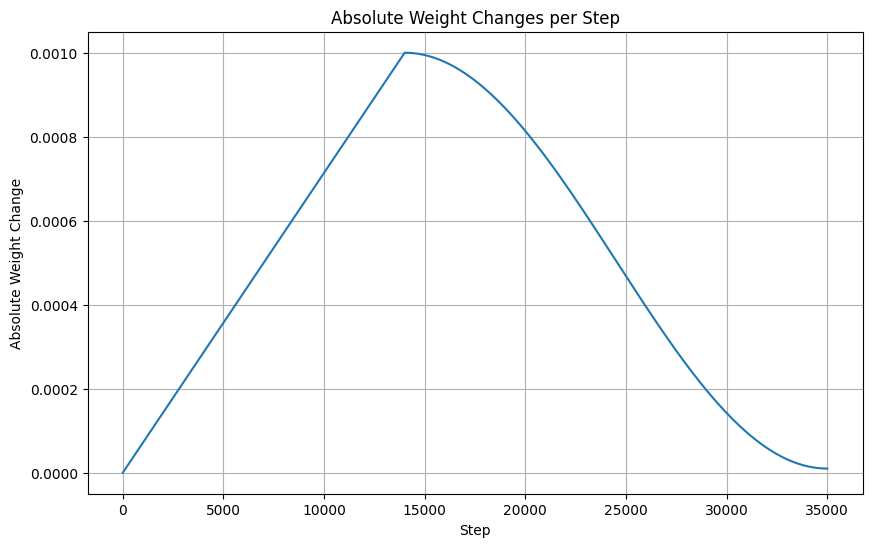

In [11]:
plot_changes(exp32_changes)

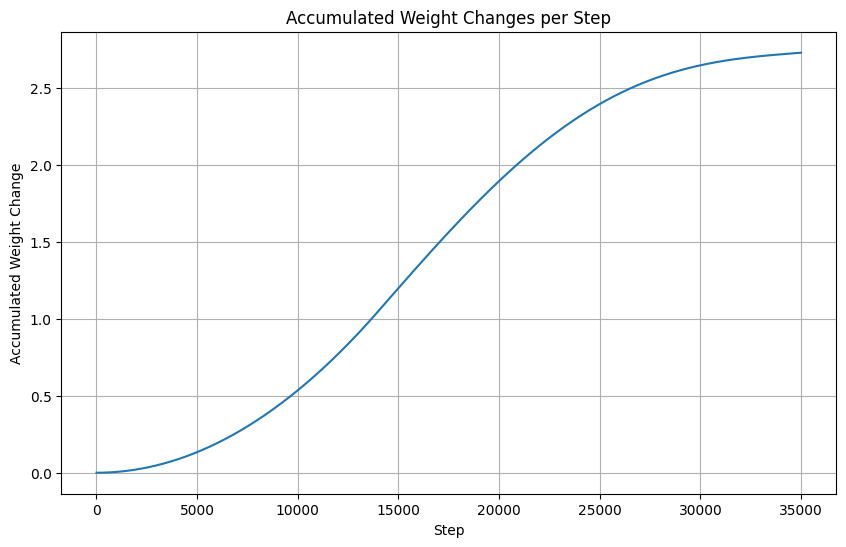

In [22]:
plot_accumulated_changes(exp32_changes)

In [16]:
exp35_total_change, exp35_changes, exp35_gradients = simulate_adam_update(LRSchedulerArgs(
    learning_rate=1.0e-05,
    lr_warmup_steps=4000,
    lr_warmup_style="linear",
    lr_decay_style="cosine",
    lr_decay_steps=16000,
    lr_decay_starting_step=None,
    min_decay_lr=1.0e-05
), 20000, l2_norm_gradient=0.01)

In [17]:
exp35_total_change

0.1800048199951668

In [18]:
plot_changes(exp35_changes)

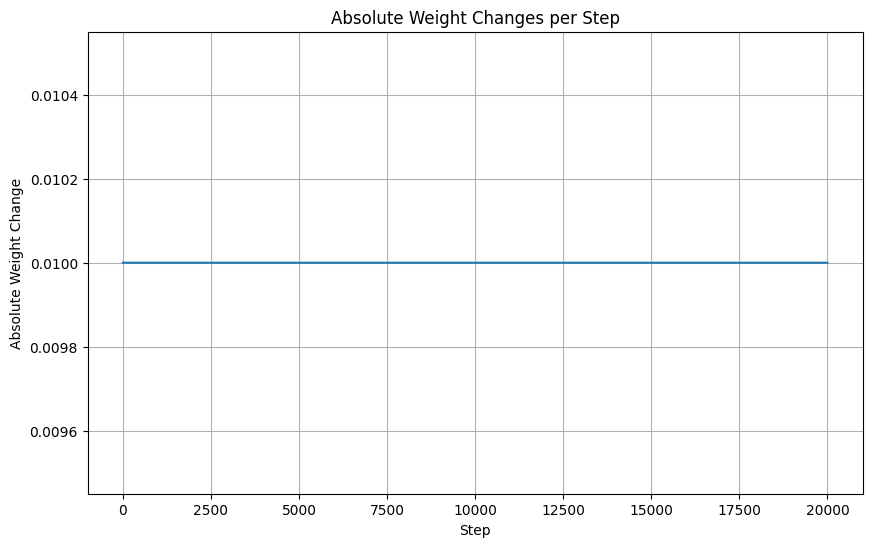

In [20]:
plot_changes(exp35_gradients)

### Lama3 Finetuning

In [6]:
simulate_adam_update(LRSchedulerArgs(
    learning_rate=1.0e-5,
    lr_warmup_steps=1994,
    lr_warmup_style="linear",
    lr_decay_style="cosine",
    lr_decay_steps=3976,
    lr_decay_starting_step=None,
    min_decay_lr=1.0e-05
), total_steps=5970, l2_norm_gradient=0.01)[0]

3.0048819951180015

#### Exp 52

In [10]:
simulate_adam_update(LRSchedulerArgs(
    learning_rate=0.001,
    lr_warmup_steps=1000,
    lr_warmup_style="linear",
    lr_decay_style="cosine",
    lr_decay_steps=None,
    lr_decay_starting_step=None,
    min_decay_lr=1.0e-05
), total_steps=5000, l2_norm_gradient=0.01)[0]

2.5200024799975047

In [12]:
simulate_adam_update(LRSchedulerArgs(
    learning_rate=0.00015,
    lr_warmup_steps=1000,
    lr_warmup_style="linear",
    lr_decay_style="cosine",
    lr_decay_steps=None,
    lr_decay_starting_step=None,
    min_decay_lr=1.0e-05
), total_steps=20000, l2_norm_gradient=1.2)[0]

1.595004986708305

In [14]:
simulate_adam_update(LRSchedulerArgs(
    learning_rate=0.00015,
    lr_warmup_steps=1000,
    lr_warmup_style="linear",
    lr_decay_style="cosine",
    lr_decay_steps=None,
    lr_decay_starting_step=None,
    min_decay_lr=1.0e-05
), total_steps=20000, l2_norm_gradient=0.2)[0]

1.595004920249768

In [11]:
simulate_adam_update(LRSchedulerArgs(
    learning_rate=0.000015,
    lr_warmup_steps=1000,
    lr_warmup_style="linear",
    lr_decay_style="cosine",
    lr_decay_steps=None,
    lr_decay_starting_step=None,
    min_decay_lr=1.0e-05
), total_steps=20000, l2_norm_gradient=0.01)[0]

0.24500475499524452

In [5]:
simulate_adam_update(LRSchedulerArgs(
    learning_rate=0.0001,
    lr_warmup_steps=1000,
    lr_warmup_style="linear",
    lr_decay_style="cosine",
    lr_decay_steps=None,
    lr_decay_starting_step=None,
    min_decay_lr=1.0e-05
), total_steps=20000, l2_norm_gradient=0.01)[0]

1.0950039049960907

In [15]:
simulate_adam_update(LRSchedulerArgs(
    learning_rate=0.001,
    lr_warmup_steps=1000,
    lr_warmup_style="linear",
    lr_decay_style="cosine",
    lr_decay_steps=None,
    lr_decay_starting_step=None,
    min_decay_lr=1.0e-05
), total_steps=20000, l2_norm_gradient=0.01)[0]

10.09499490500511

In [16]:
simulate_adam_update(LRSchedulerArgs(
    learning_rate=0.003,
    lr_warmup_steps=1000,
    lr_warmup_style="linear",
    lr_decay_style="cosine",
    lr_decay_steps=None,
    lr_decay_starting_step=None,
    min_decay_lr=1.0e-05
), total_steps=5000, l2_norm_gradient=0.01)[0]

7.519997480002516

In [22]:
simulate_adam_update(LRSchedulerArgs(
    learning_rate=0.002,
    lr_warmup_steps=1000,
    lr_warmup_style="linear",
    lr_decay_style="cosine",
    lr_decay_steps=None,
    lr_decay_starting_step=None,
    min_decay_lr=1.0e-05
), total_steps=20000, l2_norm_gradient=0.1)[0]

20.09500299049971

In [23]:
simulate_adam_update(LRSchedulerArgs(
    learning_rate=0.003,
    lr_warmup_steps=1000,
    lr_warmup_style="linear",
    lr_decay_style="cosine",
    lr_decay_steps=None,
    lr_decay_starting_step=None,
    min_decay_lr=1.0e-05
), total_steps=20000, l2_norm_gradient=0.1)[0]

30.095001990499778

### Exp 56

In [30]:
simulate_adam_update(LRSchedulerArgs(
    learning_rate=0.0025,
    lr_warmup_steps=1000,
    lr_warmup_style="linear",
    lr_decay_style="cosine",
    lr_decay_steps=None,
    lr_decay_starting_step=None,
    min_decay_lr=1.0e-05
), total_steps=25000, l2_norm_gradient=0.1)[0]

31.3700018630001

In [15]:
simulate_adam_update(LRSchedulerArgs(
    learning_rate=0.005,
    lr_warmup_steps=1000,
    lr_warmup_style="linear",
    lr_decay_style="cosine",
    lr_decay_steps=None,
    lr_decay_starting_step=None,
    min_decay_lr=1.0e-05
), total_steps=25000, l2_norm_gradient=0.01)[0]

62.61994238005785

### Exp 57

### Sigmoid Behavior

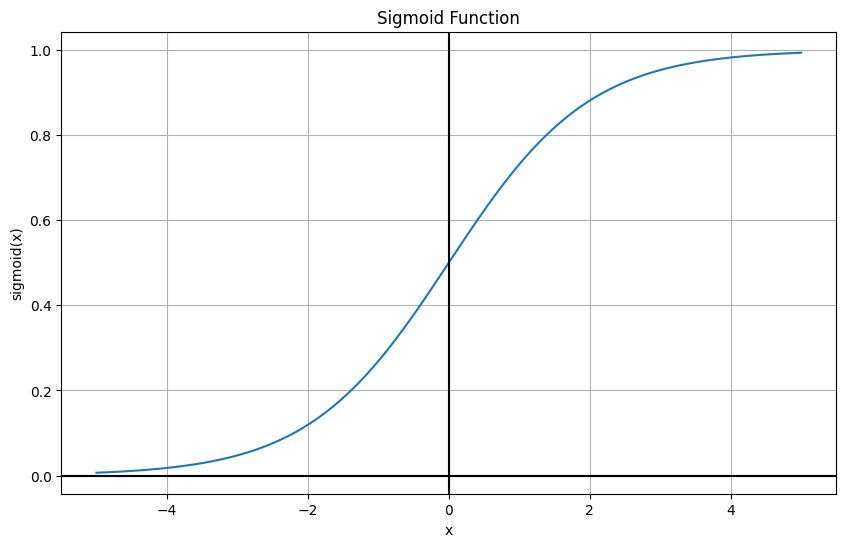

In [34]:


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-5, 5, 100)
y = sigmoid(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

In [21]:
F.sigmoid(torch.tensor([-0.003, 0.003]))

tensor([0.4992, 0.5008])

In [15]:
F.sigmoid(torch.tensor([-0.5, 0.5]))

tensor([0.3775, 0.6225])

In [30]:
F.sigmoid(torch.tensor([-0.9, 0.9]))

tensor([0.2891, 0.7109])

In [37]:
F.sigmoid(torch.tensor([-0.9, 0.9]))

tensor([0.2891, 0.7109])

In [42]:
F.sigmoid(torch.tensor([-2, 2]))

tensor([0.1192, 0.8808])